# Importing Libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.metrics import plot_confusion_matrix, classification_report, f1_score
from sklearn.model_selection import train_test_split ,GridSearchCV, cross_val_score
from sklearn.preprocessing import StandardScaler

from scipy.stats import norm
from scipy import stats

#Classification Models:
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, VotingClassifier, StackingClassifier

#Supress Warnings:
import warnings
warnings.filterwarnings('ignore')

# Load training and test sets

In [2]:
train_df = pd.read_csv('/kaggle/input/titanic/train.csv')
test_df = pd.read_csv('/kaggle/input/titanic/test.csv')
train_df = train_df.set_index("PassengerId")
train_df.head()

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
PassengerId,,,,,,,,,,,
1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


# Exploratory Data Analysis(EDA)

In [3]:
train_df.shape

(891, 11)

* dataset comprises of 891 observations and 11 chracteriestics

In [4]:
train_df.columns.values

array(['Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp', 'Parch',
       'Ticket', 'Fare', 'Cabin', 'Embarked'], dtype=object)

* Label of each column

In [5]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 891 entries, 1 to 891
Data columns (total 11 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  891 non-null    int64  
 1   Pclass    891 non-null    int64  
 2   Name      891 non-null    object 
 3   Sex       891 non-null    object 
 4   Age       714 non-null    float64
 5   SibSp     891 non-null    int64  
 6   Parch     891 non-null    int64  
 7   Ticket    891 non-null    object 
 8   Fare      891 non-null    float64
 9   Cabin     204 non-null    object 
 10  Embarked  889 non-null    object 
dtypes: float64(2), int64(4), object(5)
memory usage: 83.5+ KB


* Data has only float and integer, and object values

In [6]:
round(train_df.isnull().sum(axis=0)*100/train_df.shape[0],2)

Survived     0.00
Pclass       0.00
Name         0.00
Sex          0.00
Age         19.87
SibSp        0.00
Parch        0.00
Ticket       0.00
Fare         0.00
Cabin       77.10
Embarked     0.22
dtype: float64

* There is missing values in Sex , Cabin, Embarked columns

In [7]:
# Rows containing duplicate data
duplicate_rows_df = train_df[train_df.duplicated()]
print(f'number of duplicate rows: {duplicate_rows_df.shape}')

number of duplicate rows: (0, 11)


* There is no duplicate rows

### Summary Statistics

In [8]:
train_df.describe()

,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


* Natably large differnece in 75th %tile and max values of predictors 'Fare', 'Age'.

### Understanding Target variable

In [9]:
train_df.Survived.unique()

array([0, 1])

In [10]:
train_df.Survived.value_counts()

0    549
1    342
Name: Survived, dtype: int64

# Data Visualization

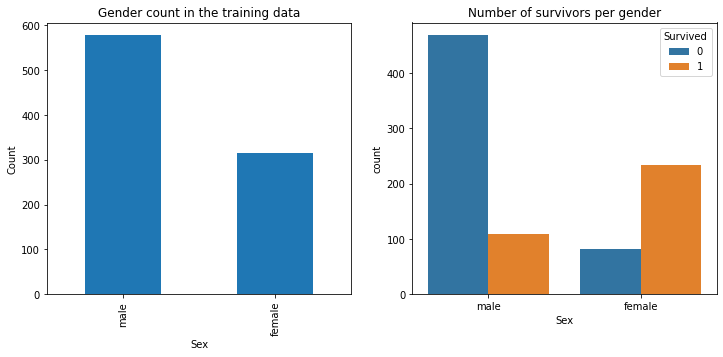

In [11]:
fig, ax = plt.subplots(1, 2, figsize=(12,5))
train_df["Sex"].value_counts().plot(kind='bar',
                                    title= "Gender count in the training data",
                                    xlabel= 'Sex',
                                    ylabel= 'Count',
                                    ax=ax[0])

ax[1].set_title("Number of survivors per gender")
sns.countplot(data=train_df, 
              x="Sex",
              hue="Survived",
              ax=ax[1])

plt.show()

* Males are more than females in the dataset
* Females survived more than males

### To check Outliers

<AxesSubplot:xlabel='Fare'>

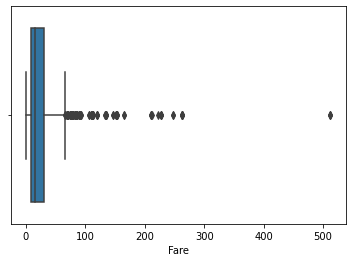

In [12]:
sns.boxplot(x=train_df['Fare'])

<AxesSubplot:xlabel='Age'>

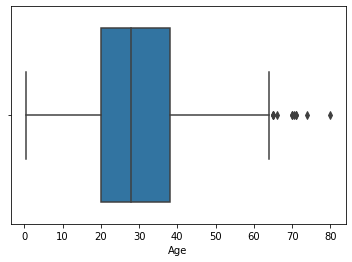

In [13]:
sns.boxplot(x=train_df['Age'])

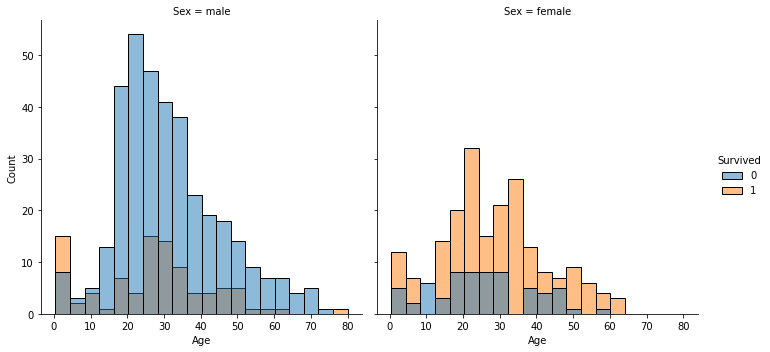

In [14]:
sns.displot(data=train_df,
            x="Age",
            col="Sex",
            hue="Survived");

### To check correlation

,Survived,Pclass,Age,SibSp,Parch,Fare
Survived,1.000000,-0.338481,-0.077221,-0.035322,0.081629,0.257307
Pclass,-0.338481,1.000000,-0.369226,0.083081,0.018443,-0.549500
Age,-0.077221,-0.369226,1.000000,-0.308247,-0.189119,0.096067
SibSp,-0.035322,0.083081,-0.308247,1.000000,0.414838,0.159651
Parch,0.081629,0.018443,-0.189119,0.414838,1.000000,0.216225
Fare,0.257307,-0.549500,0.096067,0.159651,0.216225,1.000000


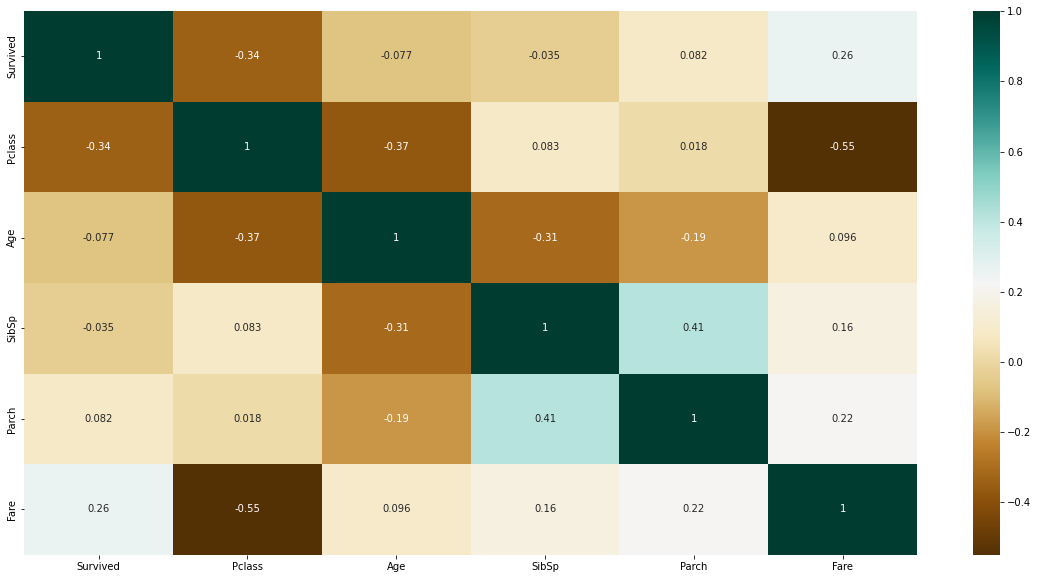

In [15]:
plt.figure(figsize=(20,10))
c= train_df.corr()
sns.heatmap(c,cmap='BrBG',annot=True)
c

# Clean Data

* convert labels from object to their correct type.

In [16]:
type_category=['Sex', 'Cabin', 'Embarked', 'Ticket']

In [17]:
for df in [train_df, test_df]:
    for i in type_category:
        df[i]=df[i].astype("category")
    df['Name']=df['Name'].astype("string")

In [18]:
train_df.dtypes

Survived       int64
Pclass         int64
Name          string
Sex         category
Age          float64
SibSp          int64
Parch          int64
Ticket      category
Fare         float64
Cabin       category
Embarked    category
dtype: object

### Fill null values

* fill missing values for numerical columns with mean

In [19]:
train_df=train_df.fillna(train_df.mean())

In [20]:
test_df=test_df.fillna(test_df.mean())

* fill missing values for categorical columns (using its own most frequent value)

In [21]:
train_df = train_df.fillna(train_df.mode().iloc[0]) 

In [22]:
test_df = test_df.fillna(test_df.mode().iloc[0]) 

In [23]:
round(train_df.isnull().sum(axis=0)*100/train_df.shape[0],2)

Survived    0.0
Pclass      0.0
Name        0.0
Sex         0.0
Age         0.0
SibSp       0.0
Parch       0.0
Ticket      0.0
Fare        0.0
Cabin       0.0
Embarked    0.0
dtype: float64

# Preprocessing:

### Encode "Sex" and "Embarked" features

In [24]:
for df in [train_df, test_df]:
    df["Sex"] = df["Sex"].map({"male":1, "female":0, 1:1, 0:0})
    df["Embarked"] = df["Embarked"].map({"Q":0, "C":1 ,"S":2 ,2:2 ,1:1, 0:0})
    
train_df.head()

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
PassengerId,,,,,,,,,,,
1,0,3,"Braund, Mr. Owen Harris",1,22.0,1,0,A/5 21171,7.2500,B96 B98,2
2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",0,38.0,1,0,PC 17599,71.2833,C85,1
3,1,3,"Heikkinen, Miss. Laina",0,26.0,0,0,STON/O2. 3101282,7.9250,B96 B98,2
4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",0,35.0,1,0,113803,53.1000,C123,2
5,0,3,"Allen, Mr. William Henry",1,35.0,0,0,373450,8.0500,B96 B98,2


### Split training data into training and validation sets

In [25]:
selected_features=["Pclass", "Sex", "Age", "SibSp", "Parch","Fare", 'Embarked']

X_train, X_val, y_train, y_val = train_test_split(train_df[selected_features],
                                                  train_df["Survived"],
                                                  test_size = 0.1,
                                                  stratify = train_df["Survived"],
                                                  random_state=0)

X_test = test_df[selected_features]

X_train.head()

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
PassengerId,,,,,,,
891,3,1,32.0,0,0,7.7500,0
474,2,0,23.0,0,0,13.7917,1
837,3,1,21.0,0,0,8.6625,2
330,1,0,16.0,0,1,57.9792,1
738,1,1,35.0,0,0,512.3292,1


### Normalize "Age" and "Fare" features

In [26]:
sc = StandardScaler()
scaled_features = ["Age", "Fare"]

sc.fit(X_train[scaled_features])

for df in [X_train, X_val, X_test]:
    df[scaled_features] = sc.transform(df[scaled_features])
    
X_train.describe()

,Pclass,Age,SibSp,Parch,Fare
count,801.000000,8.010000e+02,801.000000,801.000000,8.010000e+02
mean,2.307116,-6.666882e-17,0.534332,0.380774,-1.490000e-17
std,0.831000,1.000625e+00,1.105275,0.799112,1.000625e+00
min,1.000000,-2.263019e+00,0.000000,0.000000,-6.414848e-01
25%,2.000000,-5.797203e-01,0.000000,0.000000,-4.854969e-01
50%,3.000000,2.083168e-02,0.000000,0.000000,-3.569019e-01
75%,3.000000,4.343148e-01,1.000000,0.000000,-3.131147e-02
max,3.000000,3.944436e+00,8.000000,6.000000,9.442696e+00


# Model Testing

In [27]:
print("\033[1mSupport Vector Machine Classifier:\033[0m")
# model = RandomForestClassifier(n_estimators=100,
#                                criterion="entropy",
#                                max_depth=4,
#                                min_samples_split=4,
#                                bootstrap=True,
#                                max_samples=0.8,
#                                oob_score=True,
#                                n_jobs=-1,
#                                random_state=0)
model = SVC(C=11,
            kernel="rbf",
            gamma="scale",
            break_ties=True,
            random_state=0)
model.fit(X_train, y_train)
cross_val_score(model, X_train, y_train, cv=5).mean()

Support Vector Machine Classifier:


0.8177406832298137

In [28]:
print("The accuracy of the classifier on the test set is ", (model.score(X_train, y_train)))
print("The accuracy of the classifier on the validation set is ", (model.score(X_val, y_val)))

The accuracy of the classifier on the test set is  0.8451935081148564
The accuracy of the classifier on the validation set is  0.8222222222222222


# Test Data predictions

In [29]:
test_df["Survived"] = model.predict(X_test)
submission = test_df[["PassengerId", "Survived"]]
submission

,PassengerId,Survived
0,892,0
1,893,0
2,894,0
3,895,0
4,896,0
...,...,...
413,1305,0
414,1306,1
415,1307,0
416,1308,0


In [30]:
submission.to_csv('submission.csv', index=False)